<a href="https://colab.research.google.com/github/ScripterX-00/Employee_Attendance_Forecasting/blob/main/Employee_Attendance_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import calendar
from sklearn.model_selection import TimeSeriesSplit


In [ ]:

df = pd.read_csv('employee_attendance.csv')

In [ ]:

df.head(10)

,EmpId,Date,Present,IsManual,InTime,OutTime,InDiff,OutDiff,IsLate,EarlyDeparture,MachineNo,IPAddress
0,E0001,2025-01-01,True,False,10:30:46,19:36:12,0.77,-23.80,True,True,M01,192.168.1.10
1,E0002,2025-01-01,True,False,10:41:24,20:08:55,11.40,8.92,True,False,M02,192.168.1.15
2,E0003,2025-01-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0004,2025-01-01,True,False,10:32:47,19:47:10,2.78,-12.83,True,True,M03,192.168.1.20
4,E0005,2025-01-01,True,False,10:30:47,19:42:42,0.78,-17.30,True,True,M03,192.168.1.20
5,E0006,2025-01-01,True,False,10:43:49,20:20:40,13.82,20.67,True,False,M01,192.168.1.10
6,E0007,2025-01-01,True,False,10:29:14,19:48:08,-0.77,-11.87,False,True,M01,192.168.1.10
7,E0008,2025-01-01,True,True,10:30:00,20:00:00,0.00,0.00,False,False,M01,192.168.1.10
8,E0009,2025-01-01,True,False,10:22:21,NaN,-7.65,NaN,False,NaN,M02,192.168.1.15
9,E0010,2025-01-01,True,False,10:11:51,16:42:40,-18.15,-197.33,False,True,M03,192.168.1.20


In [ ]:
df.drop(columns = ['IsManual',	'MachineNo',	'IPAddress'], axis = 1, inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,InDiff,OutDiff
count,9204.000000,9197.000000
mean,2.608529,-0.935314
std,16.830258,35.305272
min,-23.180000,-1199.880000
25%,-3.870000,-10.650000
50%,1.580000,1.980000
75%,7.220000,10.030000
max,235.300000,224.380000


In [ ]:
df.head()

,EmpId,Date,Present,InTime,OutTime,InDiff,OutDiff,IsLate,EarlyDeparture
0,E0001,2025-01-01,True,10:30:46,19:36:12,0.77,-23.80,True,True
1,E0002,2025-01-01,True,10:41:24,20:08:55,11.40,8.92,True,False
2,E0003,2025-01-01,False,NaN,NaN,NaN,NaN,NaN,NaN
3,E0004,2025-01-01,True,10:32:47,19:47:10,2.78,-12.83,True,True
4,E0005,2025-01-01,True,10:30:47,19:42:42,0.78,-17.30,True,True


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['InTime'] = pd.to_datetime(df['InTime'])
df['OutTime'] = pd.to_datetime(df['OutTime'])

/tmp/ipython-input-2368474165.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InTime'] = pd.to_datetime(df['InTime'])
/tmp/ipython-input-2368474165.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OutTime'] = pd.to_datetime(df['OutTime'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EmpId           10000 non-null  object        
 1   Date            10000 non-null  datetime64[ns]
 2   Present         10000 non-null  bool          
 3   InTime          9204 non-null   datetime64[ns]
 4   OutTime         9197 non-null   datetime64[ns]
 5   InDiff          9204 non-null   float64       
 6   OutDiff         9197 non-null   float64       
 7   IsLate          9204 non-null   object        
 8   EarlyDeparture  9197 non-null   object        
dtypes: bool(1), datetime64[ns](3), float64(2), object(3)
memory usage: 634.9+ KB


In [ ]:
df.describe()

,Date,InTime,OutTime,InDiff,OutDiff
count,10000,9204,9197,9204.000000,9197.000000
mean,2025-03-11 07:12:00,2025-08-11 10:32:36.514993664,2025-08-11 19:59:03.881591808,2.608529,-0.935314
min,2025-01-01 00:00:00,2025-08-11 10:06:49,2025-08-11 00:00:07,-23.180000,-1199.880000
25%,2025-02-04 18:00:00,2025-08-11 10:26:08,2025-08-11 19:49:21,-3.870000,-10.650000
50%,2025-03-11 12:00:00,2025-08-11 10:31:35,2025-08-11 20:01:59,1.580000,1.980000
75%,2025-04-15 06:00:00,2025-08-11 10:37:13,2025-08-11 20:10:02,7.220000,10.030000
max,2025-05-20 00:00:00,2025-08-11 14:25:18,2025-08-11 23:44:23,235.300000,224.380000
std,NaN,NaN,NaN,16.830258,35.305272


In [ ]:
df.rename(columns={'IsLate': 'LateArrival'}, inplace=True)

In [ ]:

for emp_id, emp_data in df.groupby('EmpId'):
    present_data = emp_data[(emp_data['Present'] == 1) & (~emp_data['OutTime'].isna()) & (~emp_data['OutDiff'].isna())]

    if present_data.empty:
        continue
    mode_out_time = present_data['OutTime'].mode().iloc[0]
    mode_out_diff = present_data['OutDiff'].mode().iloc[0]

    mask = (df['EmpId'] == emp_id) & (df['Present'] == 1) & (df['OutTime'].isna())

    df.loc[mask, 'OutTime'] = mode_out_time
    df.loc[mask, 'OutDiff'] = mode_out_diff

In [ ]:
df.isnull().sum()

,0
EmpId,0
Date,0
Present,0
InTime,796
OutTime,643
InDiff,796
OutDiff,643
LateArrival,796
EarlyDeparture,803


In [ ]:
df.dropna(inplace = True)

In [ ]:

df.shape

(9044, 9)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['LateArrival'] = df['LateArrival'].astype(str).str.strip().str.lower().map({'true': True, 'false': False})
df['EarlyDeparture'] = df['EarlyDeparture'].astype(str).str.strip().str.lower().map({'true': True, 'false': False})

In [ ]:
df.head()

,EmpId,Date,Present,InTime,OutTime,InDiff,OutDiff,LateArrival,EarlyDeparture
0,E0001,2025-01-01,True,2025-08-11 10:30:46,2025-08-11 19:36:12,0.77,-23.80,True,True
1,E0002,2025-01-01,True,2025-08-11 10:41:24,2025-08-11 20:08:55,11.40,8.92,True,False
3,E0004,2025-01-01,True,2025-08-11 10:32:47,2025-08-11 19:47:10,2.78,-12.83,True,True
4,E0005,2025-01-01,True,2025-08-11 10:30:47,2025-08-11 19:42:42,0.78,-17.30,True,True
5,E0006,2025-01-01,True,2025-08-11 10:43:49,2025-08-11 20:20:40,13.82,20.67,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9044 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EmpId           9044 non-null   object        
 1   Date            9044 non-null   datetime64[ns]
 2   Present         9044 non-null   bool          
 3   InTime          9044 non-null   datetime64[ns]
 4   OutTime         9044 non-null   datetime64[ns]
 5   InDiff          9044 non-null   float64       
 6   OutDiff         9044 non-null   float64       
 7   LateArrival     9044 non-null   bool          
 8   EarlyDeparture  9044 non-null   bool          
dtypes: bool(3), datetime64[ns](3), float64(2), object(1)
memory usage: 521.1+ KB


In [ ]:
df['Working_Hrs'] = df['OutTime'] - df['InTime'] - pd.Timedelta(hours=1.0)

In [ ]:
df['Working_Hrs_'] = df['Working_Hrs'].apply(lambda td: f"{int(td.total_seconds() // 3600):02}:{int((td.total_seconds() % 3600) // 60):02}")

In [ ]:
df.head()

,EmpId,Date,Present,InTime,OutTime,InDiff,OutDiff,LateArrival,EarlyDeparture,Working_Hrs,Working_Hrs_
0,E0001,2025-01-01,True,2025-08-11 10:30:46,2025-08-11 19:36:12,0.77,-23.80,True,True,0 days 08:05:26,08:05
1,E0002,2025-01-01,True,2025-08-11 10:41:24,2025-08-11 20:08:55,11.40,8.92,True,False,0 days 08:27:31,08:27
3,E0004,2025-01-01,True,2025-08-11 10:32:47,2025-08-11 19:47:10,2.78,-12.83,True,True,0 days 08:14:23,08:14
4,E0005,2025-01-01,True,2025-08-11 10:30:47,2025-08-11 19:42:42,0.78,-17.30,True,True,0 days 08:11:55,08:11
5,E0006,2025-01-01,True,2025-08-11 10:43:49,2025-08-11 20:20:40,13.82,20.67,True,False,0 days 08:36:51,08:36


In [ ]:
early_counts = df['EarlyDeparture'].value_counts()

total_early = early_counts.sum()
early_percentage = (early_counts.get(True, 0) / total_early) * 100

print("Total Counts:\n", early_counts)
print(f"Early Departure Percentage: {early_percentage:.2f}%")

Total Counts:
 EarlyDeparture
False    5138
True     3906
Name: count, dtype: int64
Early Departure Percentage: 43.19%


In [ ]:
late_counts = df['LateArrival'].value_counts()

total_late = late_counts.sum()
late_percentage = (late_counts.get(True, 0) / total_late) * 100
print("Total Counts :", late_counts)
print(f"Late Arrival Percentage: {late_percentage:.2f}%")

Total Counts : LateArrival
True     5204
False    3840
Name: count, dtype: int64
Late Arrival Percentage: 57.54%


In [ ]:
late_by_emp = df.groupby('EmpId')['LateArrival'].sum()
max_late = late_by_emp.max()
most_late_emps = late_by_emp[late_by_emp == max_late].index.tolist()

early_by_emp = df.groupby('EmpId')['EarlyDeparture'].sum()
max_early = early_by_emp.max()
most_early_emps = early_by_emp[early_by_emp == max_early].index.tolist()

print("\n Employee(s) with the MOST Late Arrivals:")
for emp in most_late_emps:
    print(f"EmpId: {emp} - Late Count: {int(max_late)}")

print("\n Employee(s) with the MOST Early Departures:")
for emp in most_early_emps:
    print(f"EmpId: {emp} - Early Departure Count: {int(max_early)}")



 Employee(s) with the MOST Late Arrivals:
EmpId: E0055 - Late Count: 66

 Employee(s) with the MOST Early Departures:
EmpId: E0021 - Early Departure Count: 54


In [ ]:

total_attendance_issues = df.groupby('EmpId')[['LateArrival', 'EarlyDeparture']].sum()
total_attendance_issues['TotalIssues'] = total_attendance_issues['LateArrival'] + total_attendance_issues['EarlyDeparture']

max_issues = total_attendance_issues['TotalIssues'].max()
most_problematic_emps = total_attendance_issues[total_attendance_issues['TotalIssues'] == max_issues]

print("\n Employee(s) with the MOST Combined Late Arrivals + Early Departures:")
for emp_id, row in most_problematic_emps.iterrows():
    print(f"EmpId: {emp_id} - Late: {int(row['LateArrival'])}, Early: {int(row['EarlyDeparture'])}, Total Issues: {int(row['TotalIssues'])}")



 Employee(s) with the MOST Combined Late Arrivals + Early Departures:
EmpId: E0075 - Late: 61, Early: 48, Total Issues: 109


In [ ]:

df.head(10)

,EmpId,Date,Present,InTime,OutTime,InDiff,OutDiff,LateArrival,EarlyDeparture,Working_Hrs,Working_Hrs_
0,E0001,2025-01-01,True,2025-08-11 10:30:46,2025-08-11 19:36:12,0.77,-23.80,True,True,0 days 08:05:26,08:05
1,E0002,2025-01-01,True,2025-08-11 10:41:24,2025-08-11 20:08:55,11.40,8.92,True,False,0 days 08:27:31,08:27
3,E0004,2025-01-01,True,2025-08-11 10:32:47,2025-08-11 19:47:10,2.78,-12.83,True,True,0 days 08:14:23,08:14
4,E0005,2025-01-01,True,2025-08-11 10:30:47,2025-08-11 19:42:42,0.78,-17.30,True,True,0 days 08:11:55,08:11
5,E0006,2025-01-01,True,2025-08-11 10:43:49,2025-08-11 20:20:40,13.82,20.67,True,False,0 days 08:36:51,08:36
6,E0007,2025-01-01,True,2025-08-11 10:29:14,2025-08-11 19:48:08,-0.77,-11.87,False,True,0 days 08:18:54,08:18
7,E0008,2025-01-01,True,2025-08-11 10:30:00,2025-08-11 20:00:00,0.00,0.00,False,False,0 days 08:30:00,08:30
9,E0010,2025-01-01,True,2025-08-11 10:11:51,2025-08-11 16:42:40,-18.15,-197.33,False,True,0 days 05:30:49,05:30
10,E0011,2025-01-01,True,2025-08-11 10:34:13,2025-08-11 19:59:06,4.22,-0.90,True,True,0 days 08:24:53,08:24
11,E0012,2025-01-01,True,2025-08-11 10:37:12,2025-08-11 19:34:10,7.20,-25.83,True,True,0 days 07:56:58,07:56


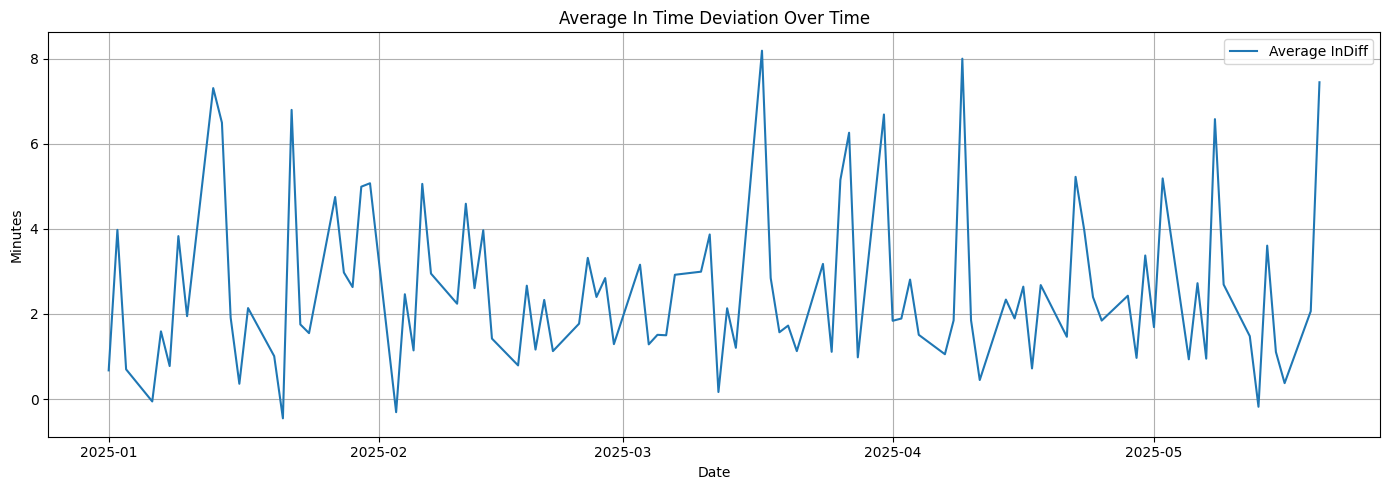

In [ ]:




daily_avg = df.groupby(df['Date'].dt.date)[['InDiff', 'OutDiff']].mean()
plt.figure(figsize=(14, 5))
plt.plot(daily_avg.index, daily_avg['InDiff'], label='Average InDiff')
plt.title('Average In Time Deviation Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

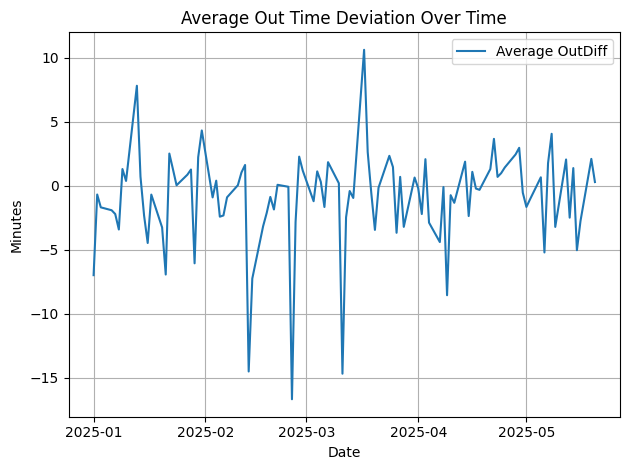

In [ ]:
plt.plot(daily_avg.index, daily_avg['OutDiff'], label='Average OutDiff')
plt.title('Average Out Time Deviation Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

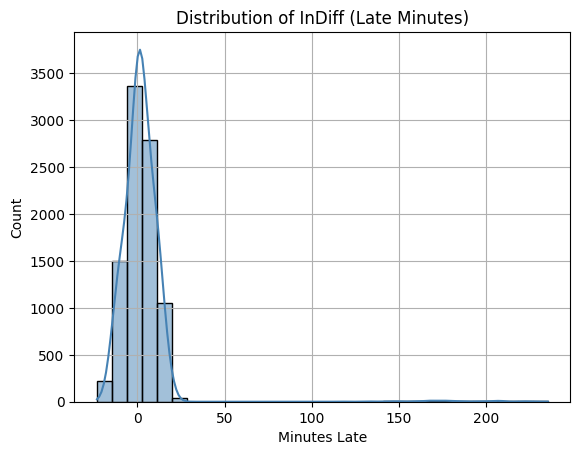

In [ ]:
sns.histplot(df['InDiff'], kde=True, bins=30, color='steelblue')
plt.title('Distribution of InDiff (Late Minutes)')
plt.xlabel('Minutes Late')
plt.grid(True)
plt.show()

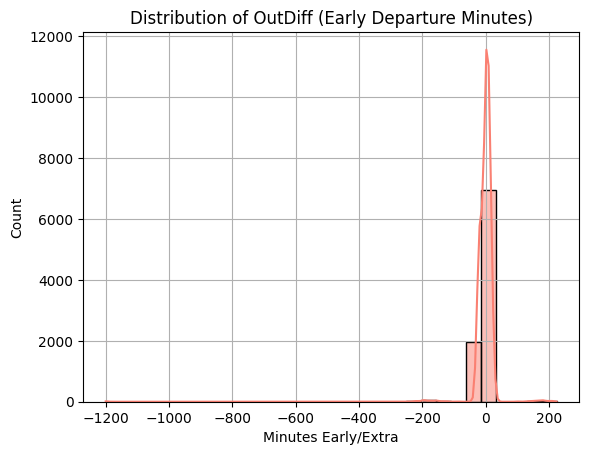

In [ ]:



sns.histplot(df['OutDiff'], kde=True, bins=30, color='salmon')
plt.title('Distribution of OutDiff (Early Departure Minutes)')
plt.xlabel('Minutes Early/Extra')
plt.grid(True)
plt.show()

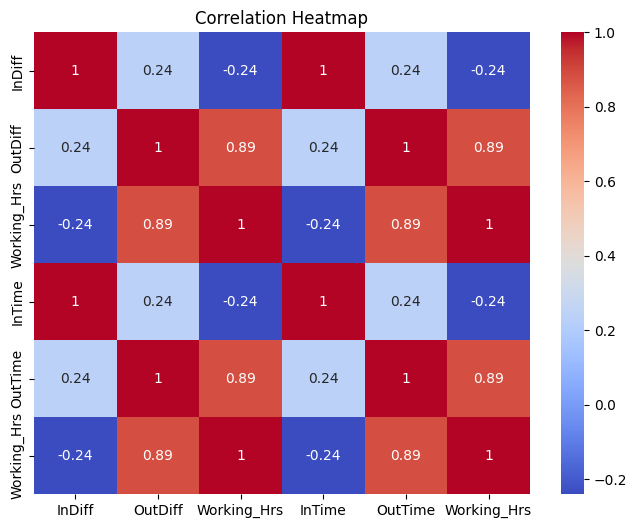

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['InDiff', 'OutDiff', 'Working_Hrs', 'InTime', 'OutTime', 'Working_Hrs']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

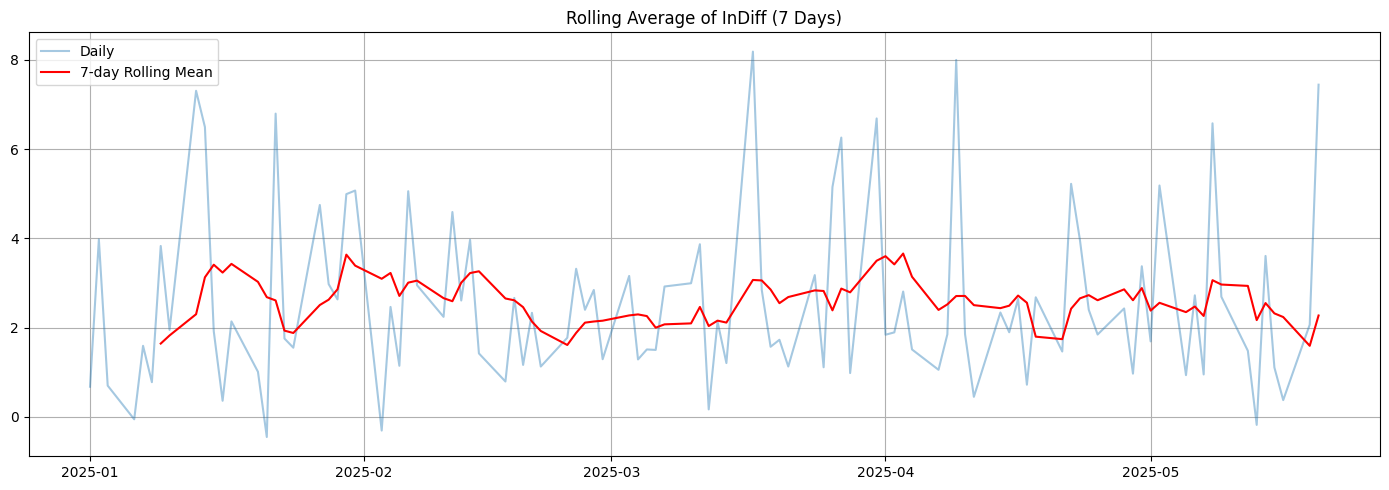

In [ ]:

rolling = daily_avg.rolling(window=7).mean()
plt.figure(figsize=(14, 5))
plt.plot(daily_avg.index, daily_avg['InDiff'], alpha=0.4, label='Daily')
plt.plot(rolling.index, rolling['InDiff'], color='red', label='7-day Rolling Mean')
plt.title('Rolling Average of InDiff (7 Days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.drop('Working_Hrs', axis = 1, inplace = True)

In [ ]:
df.drop(columns = ['InTime', 'OutTime'], axis = 1, inplace = True)

In [ ]:
df.head()

,EmpId,Date,Present,InDiff,OutDiff,LateArrival,EarlyDeparture,Working_Hrs,Working_Hrs_
0,E0001,2025-01-01,True,0.77,-23.80,True,True,0 days 08:05:26,08:05
1,E0002,2025-01-01,True,11.40,8.92,True,False,0 days 08:27:31,08:27
3,E0004,2025-01-01,True,2.78,-12.83,True,True,0 days 08:14:23,08:14
4,E0005,2025-01-01,True,0.78,-17.30,True,True,0 days 08:11:55,08:11
5,E0006,2025-01-01,True,13.82,20.67,True,False,0 days 08:36:51,08:36


In [ ]:
df['EarlyDeparture'].value_counts()

,count
EarlyDeparture,
False,5138
True,3906


In [ ]:

df['LateArrival'].value_counts()

,count
LateArrival,
True,5204
False,3840


In [ ]:
# Group by Date to count Late and Early
summary = df.groupby('Date').agg(
    Total_Present=('EmpId', 'count'),
    Late_Count=('LateArrival', 'sum'), # Changed from 'IsLate' to 'LateArrival'
    Early_Count=('EarlyDeparture', 'sum')
).reset_index()

# Find date with most late arrivals
max_late_row = summary.loc[summary['Late_Count'].idxmax()]
max_early_row = summary.loc[summary['Early_Count'].idxmax()]

# Print result
print("  Date with MOST Late Arrivals:")
print(f"   Date: {max_late_row['Date'].date()}")
print(f"   Late Arrivals: {max_late_row['Late_Count']} out of {max_late_row['Total_Present']}")

print("\n Date with MOST Early Departures:")
print(f"   Date: {max_early_row['Date'].date()}")
print(f"   Early Departures: {max_early_row['Early_Count']} out of {max_early_row['Total_Present']}")

  Date with MOST Late Arrivals:
   Date: 2025-02-13
   Late Arrivals: 65 out of 95

 Date with MOST Early Departures:
   Date: 2025-05-15
   Early Departures: 56 out of 89


In [ ]:
def create_lag_features(emp_data, col, lags=5):
    for lag in range(1, lags + 1):
        emp_data[f'{col}_lag{lag}'] = emp_data[col].shift(lag)
    return emp_data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd
import numpy as np

# === Step 1: Prepare lag features for all employees ===
all_late = []
all_early = []

for empid in df['EmpId'].unique():
    emp_data = df[df['EmpId'] == empid].copy()
    late = create_lag_features(emp_data.copy(), "LateArrival", lags=7).dropna()
    early = create_lag_features(emp_data.copy(), "EarlyDeparture", lags=7).dropna()

    common_dates = set(late['Date']).intersection(set(early['Date']))
    late = late[late['Date'].isin(common_dates)].reset_index(drop=True)
    early = early[early['Date'].isin(common_dates)].reset_index(drop=True)

    for i in range(1, 8):
        late[f'LateArrival_lag{i}'] = late[f'LateArrival_lag{i}'].astype(int)
        early[f'EarlyDeparture_lag{i}'] = early[f'EarlyDeparture_lag{i}'].astype(int)

    if not late.empty and not early.empty:
        features = pd.concat([
            late[[f'LateArrival_lag{i}' for i in range(1, 8)]],
            early[[f'EarlyDeparture_lag{i}' for i in range(1, 8)]]
        ], axis=1)
        targets = pd.DataFrame({
            'LateArrival': late['LateArrival'].values,
            'EarlyDeparture': early['EarlyDeparture'].values
        })
        all_late.append(features)
        all_early.append(targets)

# === Step 2: Train MultiOutput Model ===
X_all = pd.concat(all_late, ignore_index=True)
y_all = pd.concat(all_early, ignore_index=True)

base_rf = RandomForestClassifier(
    max_depth = 12,
    min_samples_leaf=2,
    n_estimators=300,
    random_state=0,
    class_weight='balanced',
    n_jobs=-1
)
multi_model = MultiOutputClassifier(base_rf)
multi_model.fit(X_all, y_all)

# === Step 3: Evaluation ===
y_pred_all = multi_model.predict(X_all)
print("\n=== Evaluation for All Employees ===")
print(f"Exact Match Accuracy: {accuracy_score(y_all, y_pred_all):.2f}")
print(f"Macro F1 Score: {f1_score(y_all, y_pred_all, average='macro', zero_division=0):.2f}")
print("\nClassification Report (Per Label):")
print(classification_report(y_all, y_pred_all, target_names=["LateArrival", "EarlyDeparture"], zero_division=0))



=== Evaluation for All Employees ===
Exact Match Accuracy: 0.75
Macro F1 Score: 0.85

Classification Report (Per Label):
                precision    recall  f1-score   support

   LateArrival       0.89      0.86      0.88      4826
EarlyDeparture       0.83      0.84      0.83      3589

     micro avg       0.86      0.85      0.86      8415
     macro avg       0.86      0.85      0.85      8415
  weighted avg       0.86      0.85      0.86      8415
   samples avg       0.66      0.65      0.65      8415



Enter EmpId: E0001


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local


Forecast for next 5 days:

      Date  LateArrivalForecast  EarlyDepartureForecast
2025-05-21                 True                    True
2025-05-22                 True                    True
2025-05-23                 True                    True
2025-05-26                 True                    True
2025-05-27                 True                    True


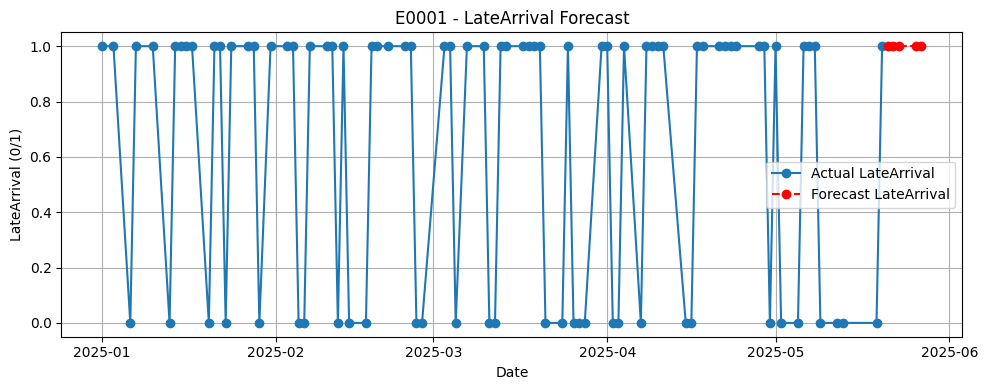

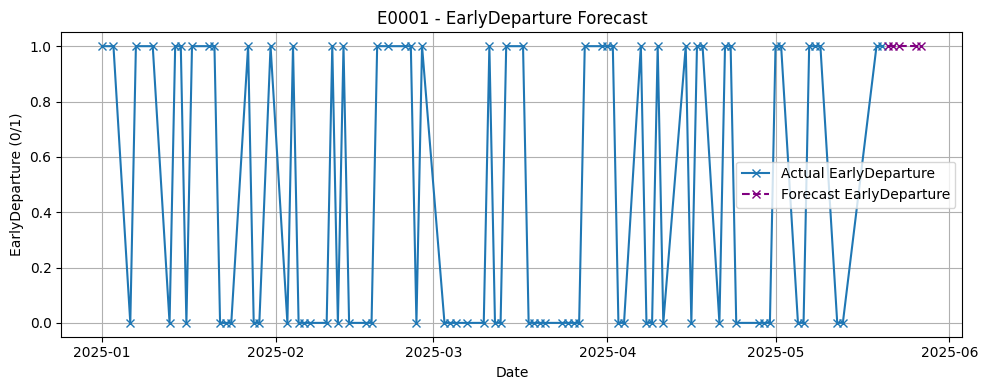

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
# === Helper function for forecasting ===
def forecast_for_emp_combined(emp_df, model, lags=7, forecast_days=5):
    forecast_rows = []
    df_copy = emp_df.copy().sort_values('Date')

    for _ in range(forecast_days):
        late_feat = create_lag_features(df_copy.copy(), "LateArrival", lags=lags).dropna().iloc[-1:]
        early_feat = create_lag_features(df_copy.copy(), "EarlyDeparture", lags=lags).dropna().iloc[-1:]

        if late_feat.empty or early_feat.empty:
            break

        late_feats = [f'LateArrival_lag{i}' for i in range(1, lags + 1)]
        early_feats = [f'EarlyDeparture_lag{i}' for i in range(1, lags + 1)]
        late_input = late_feat[late_feats].astype(int).values
        early_input = early_feat[early_feats].astype(int).values
        X_pred = np.concatenate([late_input, early_input], axis=1)

        pred = model.predict(X_pred)[0]
        next_date = df_copy['Date'].max() + pd.Timedelta(days=1)
        while next_date.dayofweek in [5, 6]:
            next_date += pd.Timedelta(days=1)

        forecast_rows.append({
            'Date': next_date,
            'LateArrivalForecast': bool(pred[0]),
            'EarlyDepartureForecast': bool(pred[1])
        })

        df_copy = pd.concat([
            df_copy,
            pd.DataFrame({
                'Date': [next_date],
                'LateArrival': [pred[0]],
                'EarlyDeparture': [pred[1]]
            })
        ], ignore_index=True)

    return pd.DataFrame(forecast_rows)

# === Forecasting for specific employee ===
empid = input("Enter EmpId: ").strip()
if empid not in df['EmpId'].unique():
    print("EmpId not found.")
else:
    emp_data = df[df['EmpId'] == empid].copy()
    forecast_table = forecast_for_emp_combined(emp_data.copy(), multi_model, lags=7, forecast_days=5)

    print("\nForecast for next 5 days:\n")
    print(forecast_table.to_string(index=False))

    emp_data = emp_data[~emp_data['Date'].dt.dayofweek.isin([5, 6])]

    plt.figure(figsize=(10, 4))
    plt.plot(emp_data['Date'], emp_data['LateArrival'], label='Actual LateArrival', marker='o')
    plt.plot(forecast_table['Date'], forecast_table['LateArrivalForecast'], label='Forecast LateArrival', linestyle='--', marker='o', color='red')
    plt.title(f'{empid} - LateArrival Forecast')
    plt.xlabel("Date")
    plt.ylabel("LateArrival (0/1)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(emp_data['Date'], emp_data['EarlyDeparture'], label='Actual EarlyDeparture', marker='x')
    plt.plot(forecast_table['Date'], forecast_table['EarlyDepartureForecast'], label='Forecast EarlyDeparture', linestyle='--', marker='x', color='purple')
    plt.title(f'{empid} - EarlyDeparture Forecast')
    plt.xlabel("Date")
    plt.ylabel("EarlyDeparture (0/1)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
